In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Parameters


In [7]:
x_max = 10.0  # Max x position
x_min = 0.0   # Min x position
t_max = 10.0  # Max time
dx = 0.1      # Grid spacing in x
dt = 0.01     # Time step
Nx = int((x_max - x_min) / dx) + 1  # Number of grid points in x
Nt = int(t_max / dt) + 1  # Number of time steps

### Create x grid


In [8]:
x = np.linspace(x_min, x_max, Nx)

### Initial conditions


In [9]:
def initial_density(t):
    return 1 + 0.1 * t  # rho(x, y, t) = 1 + 0.1t

def velocity_u(x, t):
    return x  # u(x, t) = x

def velocity_v(x, t):
    return 0  # v(x, t) = 0

In [10]:
# Initialize arrays for density and velocity
rho = np.zeros((Nx, Nt))
u = np.zeros((Nx, Nt))
v = np.zeros((Nx, Nt))

In [11]:
# Time loop to compute density and velocity
for t_idx in range(Nt):
    t = t_idx * dt
    rho[:, t_idx] = initial_density(t)
    u[:, t_idx] = velocity_u(x, t)
    v[:, t_idx] = velocity_v(x, t)

In [12]:
# Compute divergence of the flux (∇ · (ρv)) and time derivative of density (∂ρ/∂t)
def divergence_flux(rho, u, v, dx):
    # ∇ · (ρv) = (d/dx) (ρ * u)  (since v = 0)
    div_flux = np.zeros(Nx)
    for i in range(1, Nx-1):  # Skip boundary points
        div_flux[i] = (rho[i+1] * u[i+1] - rho[i-1] * u[i-1]) / (2 * dx)
    return div_flux

In [13]:
# Compute the continuity equation at each time step
continuity_check = np.zeros(Nt)
for t_idx in range(1, Nt):
    div_flux = divergence_flux(rho[:, t_idx], u[:, t_idx], v[:, t_idx], dx)
    d_rho_dt = (rho[:, t_idx] - rho[:, t_idx - 1]) / dt
    continuity_check[t_idx] = np.sum(d_rho_dt + div_flux) * dx

### Plot the continuity check over time


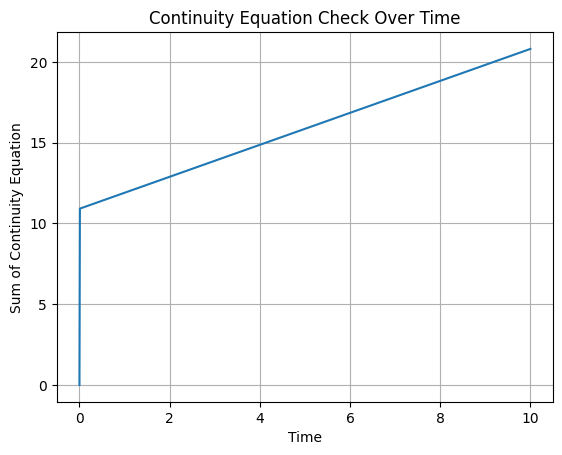

In [14]:
plt.plot(np.linspace(0, t_max, Nt), continuity_check)
plt.xlabel('Time')
plt.ylabel('Sum of Continuity Equation')
plt.title('Continuity Equation Check Over Time')
plt.grid(True)
plt.show()

### Check if continuity is satisfied (should be close to 0)


In [15]:
print(f'Continuity equation sum at the final time step: {continuity_check[-1]:.6f}')

Continuity equation sum at the final time step: 20.810000
